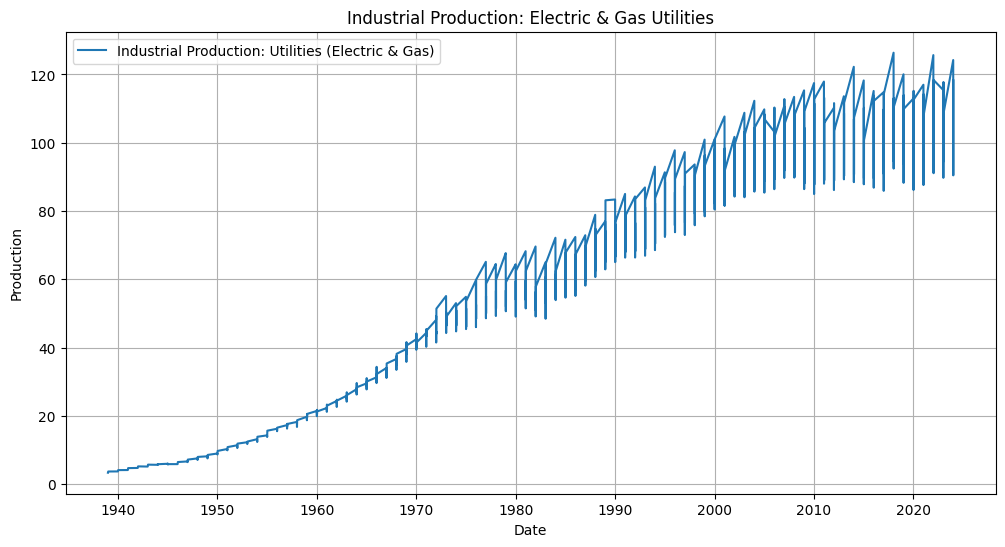

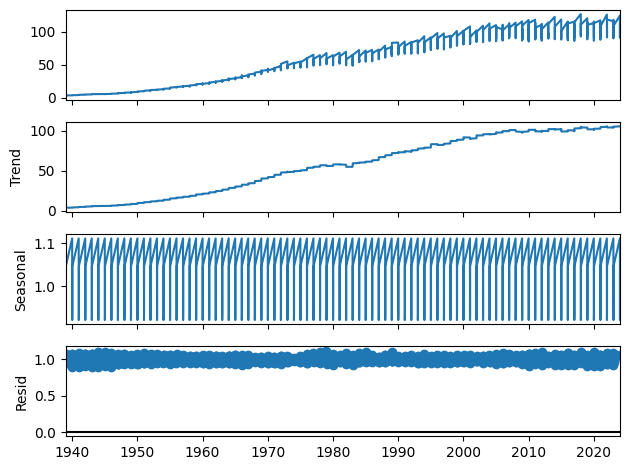

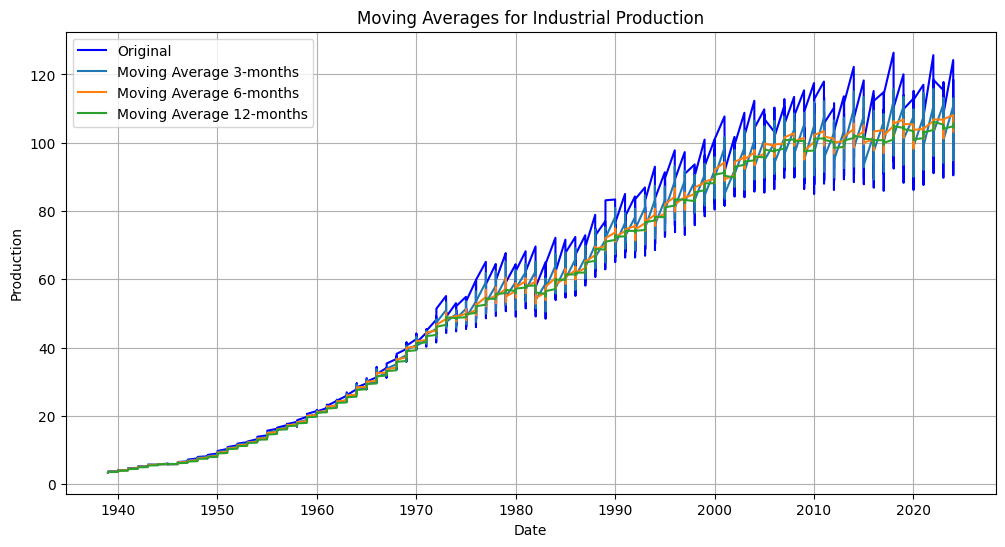

c:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harsh\miniconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\harsh\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


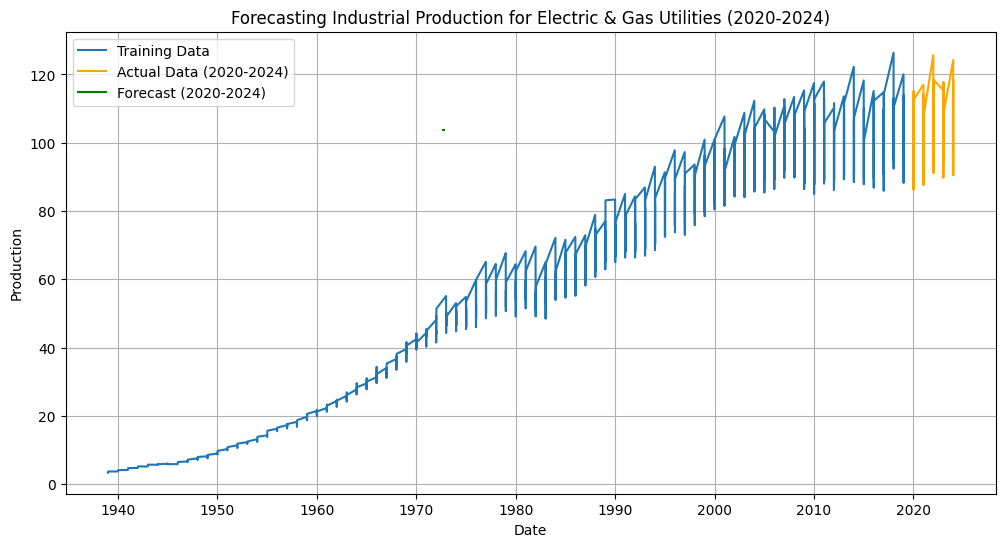

Mean Squared Error: 107.6594220615686


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
data = pd.read_csv("IPG2211A2N.csv", index_col="DATE", parse_dates=True)

# Step 2: Plot the raw data
plt.figure(figsize=(12, 6))
plt.plot(data, label="Industrial Production: Utilities (Electric & Gas)")
plt.title("Industrial Production: Electric & Gas Utilities")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Trend and Seasonal Variation (Seasonal Decomposition)
decompose_result = seasonal_decompose(
    data, model="multiplicative", period=12
)  # Assuming monthly data
decompose_result.plot()
plt.show()


# Step 4: Moving Averages
def plot_moving_average(data, window_sizes):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label="Original", color="blue")

    for window in window_sizes:
        data[f"MA_{window}"] = data["IPG2211A2N"].rolling(window=window).mean()
        plt.plot(data[f"MA_{window}"], label=f"Moving Average {window}-months")

    plt.title("Moving Averages for Industrial Production")
    plt.xlabel("Date")
    plt.ylabel("Production")
    plt.legend()
    plt.grid(True)
    plt.show()


# Moving averages for 3, 6, and 12 months
plot_moving_average(data.copy(), window_sizes=[3, 6, 12])

# Step 5: Time Series Forecasting
# Using Simple Exponential Smoothing to predict for 2020-2024

# Split data into training and testing
train = data[:"2019"]
test = data["2020":]

# Fit the model on training data
model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=True)

# Forecast for 2020-2024
forecast = model.forecast(steps=len(test))

# Plot the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data (2020-2024)", color="orange")
plt.plot(forecast, label="Forecast (2020-2024)", color="green")
plt.title("Forecasting Industrial Production for Electric & Gas Utilities (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Analysis
print(f"Mean Squared Error: {mean_squared_error(test, forecast)}")